In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Veri setini yükleyelim
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

# İlk birkaç satırı görüntüleyelim
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


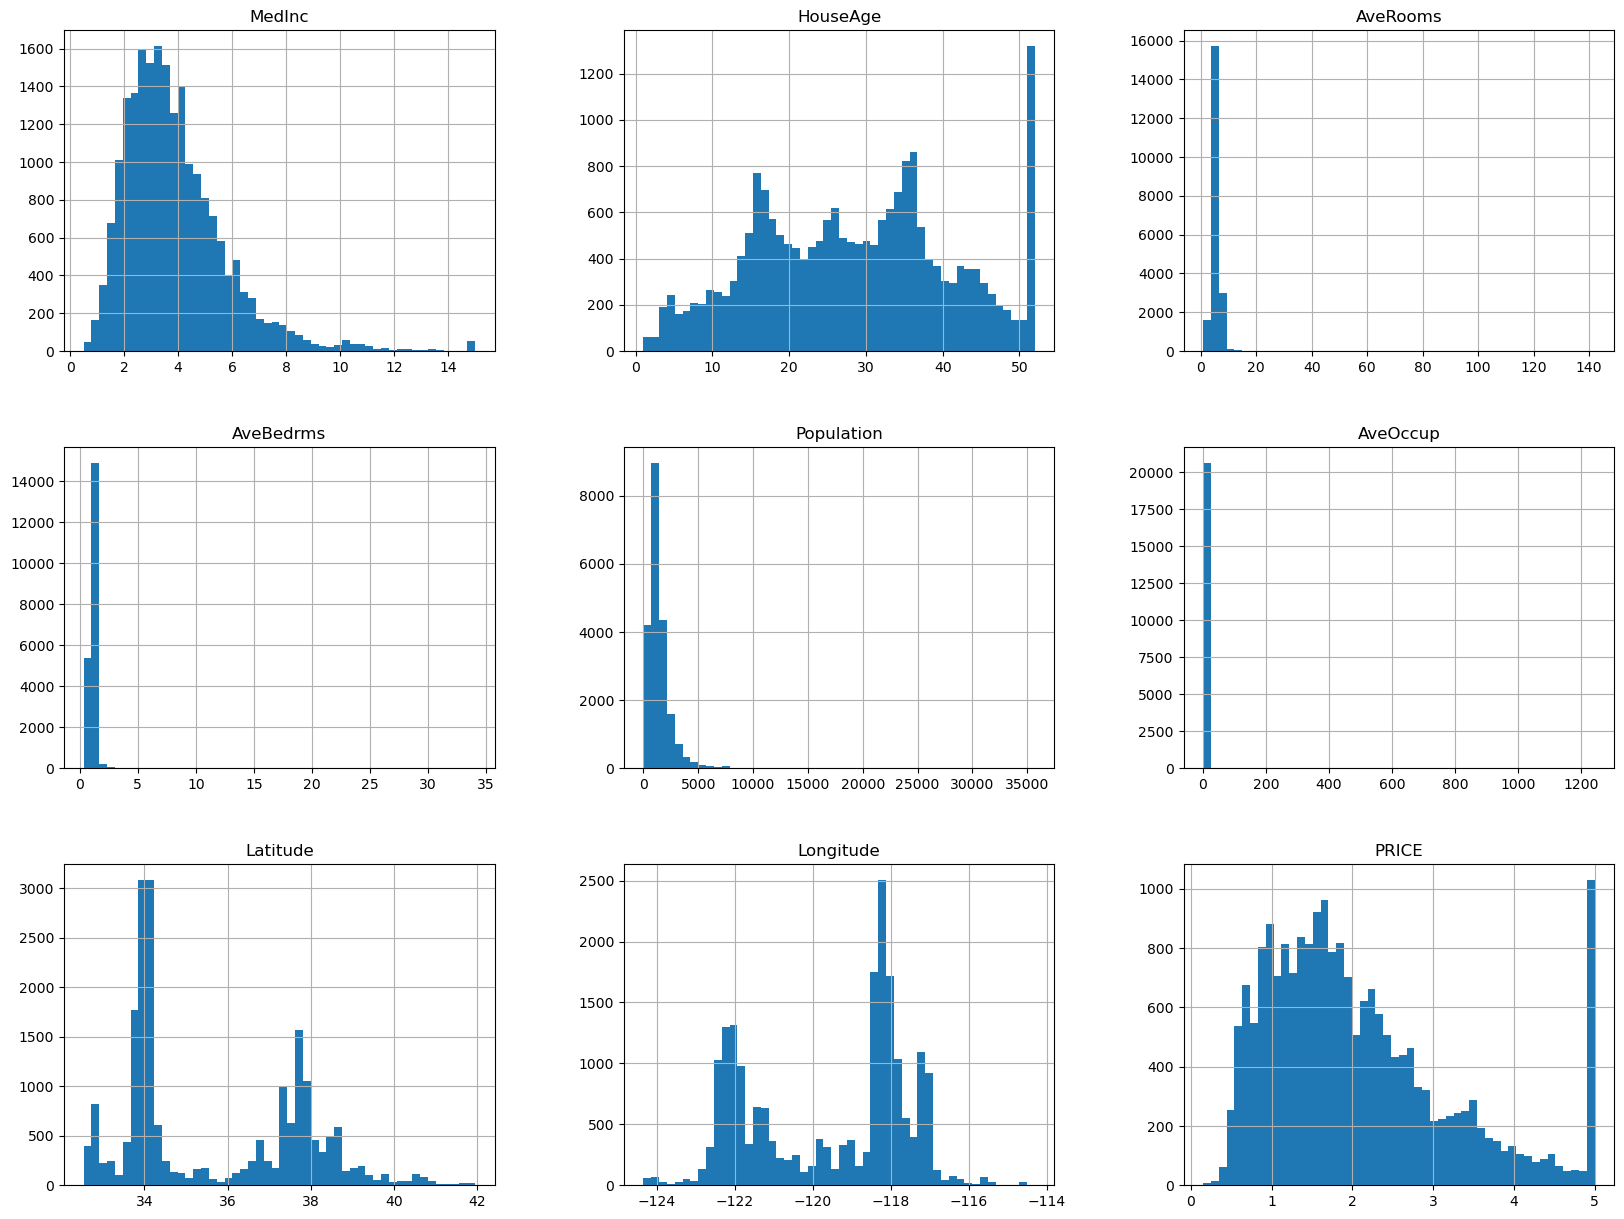

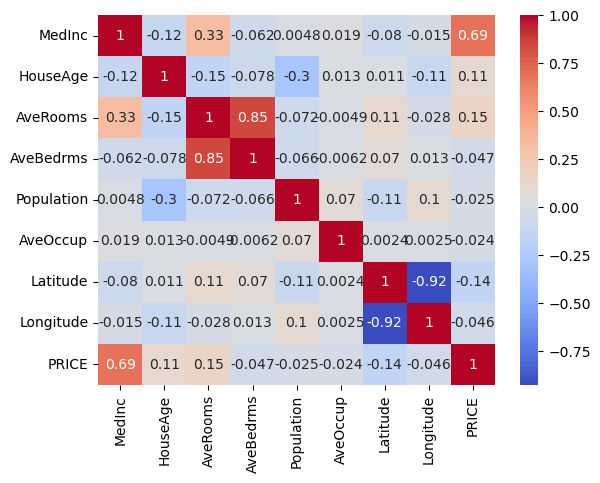

In [2]:
# Veri setinin özet istatistiklerini inceleyelim
df.describe()

# Eksik verileri kontrol edelim
df.isnull().sum()

# Veriyi görselleştirme (örn: histogramlar)
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramlar
df.hist(bins=50, figsize=(20,15))
plt.show()

# Korelasyon matrisi
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [3]:
# Özellikleri ve hedef değişkeni ayıralım
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Veriyi eğitim ve test setlerine bölelim
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirelim
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Lojistik Regresyon
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [5]:
from sklearn.metrics import mean_squared_error

# Random Forest
rf_predictions = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

# Lojistik Regresyon
lr_predictions = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)

# KNN
knn_predictions = knn_model.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_rmse = np.sqrt(knn_mse)

# Sonuçları karşılaştıralım
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Linear Regression RMSE: {lr_rmse}')
print(f'KNN RMSE: {knn_rmse}')

Random Forest RMSE: 0.5051432839771741
Linear Regression RMSE: 0.7455813830127763
KNN RMSE: 0.6575877238850522
